In [1]:
'''
Author: Siddhartha Kumar Nidhi

Dataset: https://www.kaggle.com/datasets/winterbreeze/fifa19eda
'''

'\nAuthor: Siddhartha Kumar Nidhi\n\nDataset: https://www.kaggle.com/datasets/winterbreeze/fifa19eda\n'

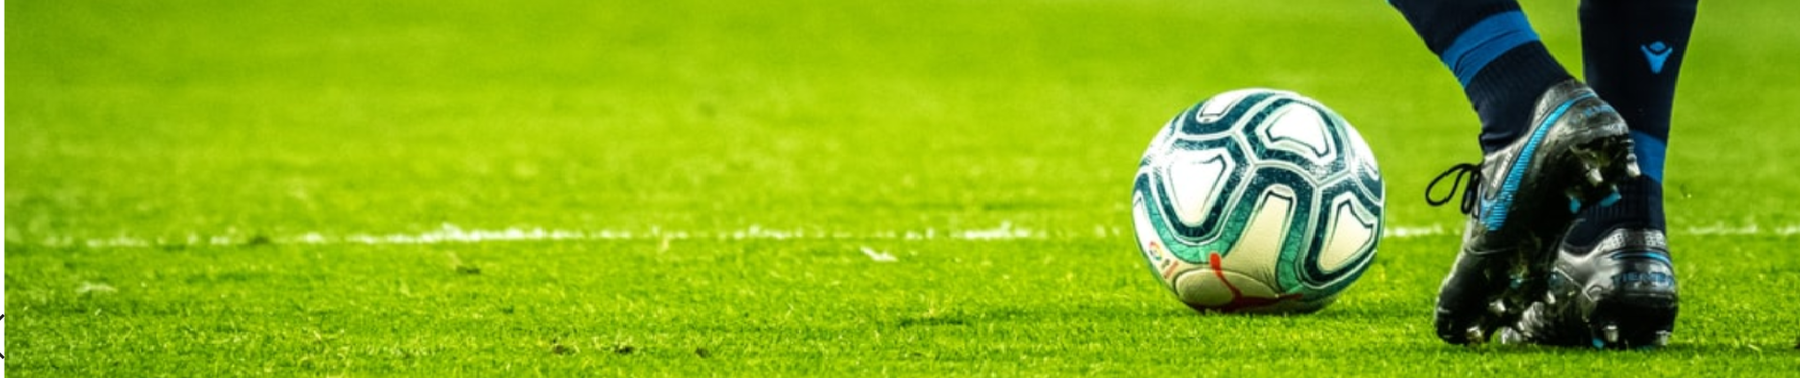

## Dataset Description

📋 FIFA Dataset Column Descriptions

---

***Name*** – The full name of the football player.
→ Helps identify each player individually.

***Age*** – The player's age in years.
→ Younger players may have more potential for growth.

***Nationality*** – The country the player represents in international matches.
→ Useful for filtering players by country or region.

***Overall*** – A number (usually out of 100) that summarizes how good the player is overall.
→ Higher means better performance in general.

***Potential*** – The highest possible rating a player can reach in their career.
→ Shows how much the player can improve in the future.

***Club*** – The professional football team the player is currently playing for.
→ Important for tracking which team the player belongs to.

***Value*** – The estimated transfer market value of the player (e.g., €50M).
→ Shows how expensive the player is to buy.

***Wage*** – The player’s weekly salary (e.g., €250K per week).
→ Indicates how much a club pays the player every week.

***Preferred Foot*** – Whether the player mostly uses their right or left foot.
→ Important for positioning and playstyle (e.g., right-wing vs. left-wing).

***Position*** – The main role or area where the player plays on the field (e.g., striker, midfielder, defender).
→ Helps categorize players by their job during a match.

***Jersey Number*** – The shirt number the player wears on the field.
→ Often used for identification; some numbers are iconic (like #10).

***Height*** – The player’s height (e.g., 6'2").
→ Taller players are often better at headers or defending.

***Weight*** – The player’s weight in pounds (lbs).
→ Can affect speed, strength, and agility on the field.

***Release Clause*** – The price at which a club must sell the player if another team offers it.
→ If this is met, the club cannot stop the player from leaving.

***Weak Foot*** – A rating from 1 to 5 that shows how well the player uses their non-dominant foot.
→ Higher means they can shoot/pass better with both feet.

***Skill Moves*** – A rating from 1 to 5 that reflects how well the player can perform tricks and fancy moves.
→ Used especially in attacking players to beat defenders.

***Work Rate*** – A description (like “High/Low”) showing how hard the player works in attack and defense.
→ E.g., High/High means the player works hard in both directions.

***Body Type*** – Describes the player's physical build, like lean, normal, or stocky.
→ Can affect animations and how the player feels during gameplay.

Display the first few rows, data types, and missing values as requested in the instructions

> Add blockquote



In [7]:
import pandas as pd

df = pd.read_csv('fifa_eda.csv')
display(df.head())

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [8]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

None

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,241
Value,252
Wage,0
Preferred Foot,0


## Strategy for handling missing/Na values

In [9]:
# Documenting the strategy for handling missing values
print("Strategy for handling missing values:")

# Strategy for 'Club'
print("\n'Club' column:")
print("- Number of missing values: 241")
print("""- Strategy: Although The 'Club' column is a categorical feature, and imputing with the mode is a reasonable approach, But you probably shouldn’t, because:
 · A player without a current club (e.g., missing Club) may be a free agent, not part of any club.
 · Imputing with the most common club (e.g., “Real Madrid” or “FC Barcelona”) would be misleading and create data bias.
 · It overrepresents that one club and skews analysis.

Recommended Approach:
Replace missing Club values with a placeholder like 'Free Agent', 'Unknown', or 'No Club'.
""")
print("---------------------------------------------------------------------------------------------------------------------------------")

# Strategy for 'Value'
print("\n'Value' column:")
print("- Number of missing values: 252")
print("""- Strategy: The 'Value' column is a numeric column so it will be ideal to replace the missing values with median, but on observation in the dataset:
 · the players who are not assigned any 'Club' likely have a missing 'Value' column
 · that's because A free agent isn’t currently in the transfer market, so they technically have no market value from a club perspective.
 · but there are 252 missing values while in 'Club' it is 241 that means 11 more
 · for these 11 observation we could use median imputation but since 11 is relatively a very lesser number we can drop them""")
print("---------------------------------------------------------------------------------------------------------------------------------")

# Strategy for 'International Reputation and Skill Moves'
print("\n'International Reputation' and 'Skill Moves' column:")
print("- Number of missing values: 48")
print("""- Strategy: They are categorical so they can be imputated with mode""")
print("---------------------------------------------------------------------------------------------------------------------------------")

# Strategy for 'Contract Valid Until'
print("\n'Contract Valid Until' column:")
print("- Number of missing values: 289")
print("""- Strategy: This column contains contract end dates — usually years. It's a temporal/categorical column, So it’s not ideal to use median or mode blindly. Instead:
 · Player is a free agent (i.e., Club = 'Free Agent')-> Set Contract Valid Until = 'Not under contract' or 'Free Agent'
 · Player has a Club, but Contract Valid Until is missing-> Set to mode (most frequent contract year)""")


Strategy for handling missing values:

'Club' column:
- Number of missing values: 241
- Strategy: Although The 'Club' column is a categorical feature, and imputing with the mode is a reasonable approach, But you probably shouldn’t, because:
 · A player without a current club (e.g., missing Club) may be a free agent, not part of any club.
 · Imputing with the most common club (e.g., “Real Madrid” or “FC Barcelona”) would be misleading and create data bias.
 · It overrepresents that one club and skews analysis.

Recommended Approach:
Replace missing Club values with a placeholder like 'Free Agent', 'Unknown', or 'No Club'.

---------------------------------------------------------------------------------------------------------------------------------

'Value' column:
- Number of missing values: 252
- Strategy: The 'Value' column is a numeric column so it will be ideal to replace the missing values with median, but on observation in the dataset:
 · the players who are not assigned any 'C

For **'Club'** column

In [10]:
# Fill missing Club with 'Free Agent'
df['Club'] = df['Club'].fillna('Free Agent')

For **'Value'** column

In [11]:
# Set Value = '€0' for Free Agents
df['Value'] = df.apply(lambda row: '€0' if row['Club'] == 'Free Agent' else row['Value'], axis=1)

# Drop remaining rows with missing Value
df = df[~df['Value'].isnull()]

For **'International Reputation'** and **'Skill Moves'** columns

In [12]:
# Fill missing International Reputation and Skill Moves with mode

df.loc[:, 'International Reputation'] = df['International Reputation'].fillna(df['International Reputation'].mode()[0])
df.loc[:, 'Skill Moves'] = df['Skill Moves'].fillna(df['Skill Moves'].mode()[0])


For **'Contract Valid Until'** column

In [13]:
# Convert to datetime safely and extract year
def extract_year(val):
    try:
        # Try to parse it as a date
        return pd.to_datetime(val, errors='coerce').year
    except:
        return None

# Apply to the column
df['Contract Valid Until'] = df['Contract Valid Until'].apply(extract_year)

In [14]:
# Find most common contract year
contract_mode = df['Contract Valid Until'].mode()[0]

# Fill Not under contract for Free Agents
df.loc[df['Club'] == 'Free Agent', 'Contract Valid Until'] = 'Not under contract'

# Fill remaining missing values with mode
df.loc[:, 'Contract Valid Until'] = df['Contract Valid Until'].fillna(contract_mode)

/tmp/ipython-input-1596981808.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not under contract' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Club'] == 'Free Agent', 'Contract Valid Until'] = 'Not under contract'


In [15]:
#display any 5 ranndom observations
df.sample(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3362,230448,Porphirinho,30,Brazil,72,72,Chapecoense,2300.0,11.0,Right,1.0,2.0,LDM,2018,2021.0,5.833333,157.0,4400.0
9798,234983,Q. Laçi,22,Albania,66,75,AC Ajaccio,1000.0,2.0,Right,1.0,3.0,CAM,2018,2019.0,5.916667,176.0,2000.0
5497,198611,N. Đurđić,32,Serbia,70,70,Hammarby IF,1400.0,5.0,Right,1.0,3.0,ST,2018,2019.0,6.000000,170.0,1800.0
17612,244598,Y. Kaiser,20,Switzerland,53,62,FC Basel 1893,80.0,2.0,Right,1.0,2.0,CB,2018,2020.0,6.000000,168.0,136.0
17704,244440,F. Nicastro,36,Italy,53,53,Neuchâtel Xamax,10.0,1.0,Right,1.0,1.0,GK,2017,2021.0,6.000000,172.0,15.0


In [16]:
# Count + Percentage of missing values after cleaning the dataset
missing_info = df.isnull().sum().to_frame(name='Missing Values')
missing_info['% of Total'] = (df.isnull().sum() / len(df)) * 100
print(missing_info)

                          Missing Values  % of Total
ID                                     0         0.0
Name                                   0         0.0
Age                                    0         0.0
Nationality                            0         0.0
Overall                                0         0.0
Potential                              0         0.0
Club                                   0         0.0
Value                                  0         0.0
Wage                                   0         0.0
Preferred Foot                         0         0.0
International Reputation               0         0.0
Skill Moves                            0         0.0
Position                               0         0.0
Joined                                 0         0.0
Contract Valid Until                   0         0.0
Height                                 0         0.0
Weight                                 0         0.0
Release Clause                         0      

## Detecting and Handling outliers

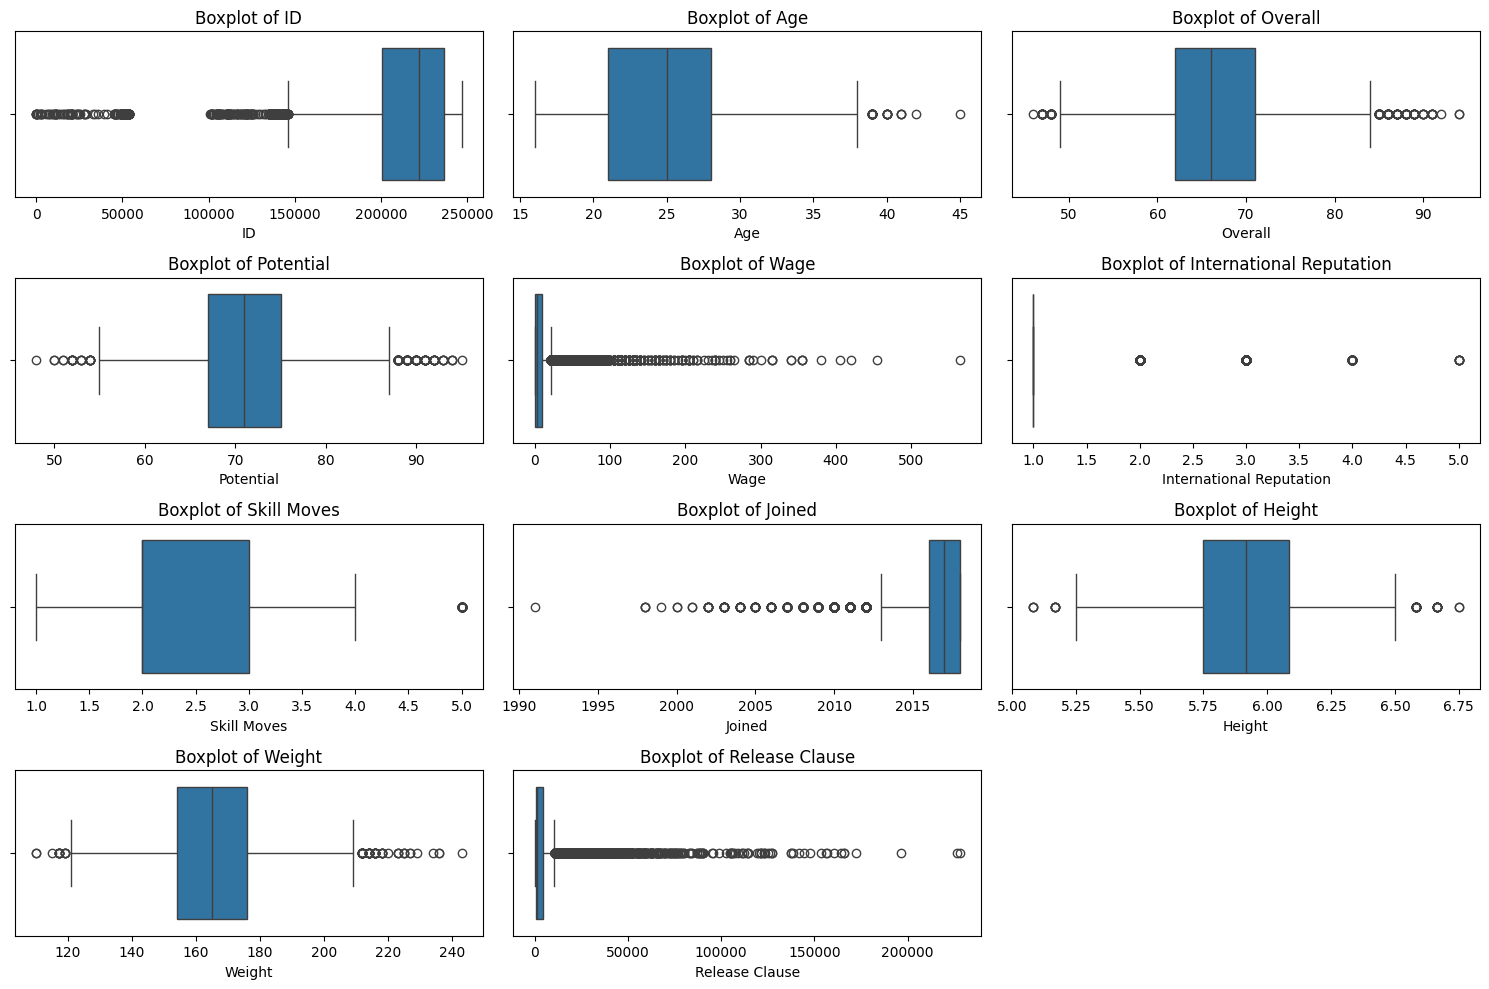

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot boxplots for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) // 3) + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


In [18]:
'''
-----------Inter-Quartile Range Method----------
💡 Use: Best for skewed or non-normal distributions. Very interpretable.
'''
# Store outlier counts
iqr_outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    iqr_outlier_counts[col] = len(outliers)

print("🔍 Outlier counts using IQR method:")
for col, count in iqr_outlier_counts.items():
    print(f"{col}: {count} outliers")


🔍 Outlier counts using IQR method:
ID: 448 outliers
Age: 36 outliers
Overall: 162 outliers
Potential: 156 outliers
Wage: 2031 outliers
International Reputation: 1623 outliers
Skill Moves: 51 outliers
Joined: 915 outliers
Height: 41 outliers
Weight: 74 outliers
Release Clause: 1866 outliers


In [19]:
"""
----------------Z-Score Method----------------
💡 Use: Assumes normal distribution. May be less reliable for skewed data.
"""
from scipy.stats import zscore
import numpy as np

# Compute z-scores for numeric columns
z_scores = df[numeric_cols].apply(zscore)

# Define threshold
z_threshold = 3

# Count z-score outliers
zscore_outlier_counts = (np.abs(z_scores) > z_threshold).sum()

print("\n📈 Outlier counts using Z-score method (threshold > 3):")
print(zscore_outlier_counts)


📈 Outlier counts using Z-score method (threshold > 3):
ID                          223
Age                          12
Overall                      55
Potential                    64
Wage                        307
International Reputation    365
Skill Moves                  51
Joined                      377
Height                       38
Weight                       51
Release Clause              315
dtype: int64


In [20]:

print("""Before choosing IQR or Z-score, we must understand the distribution of our data — whether it's normal (bell-shaped) or skewed.""")

skew_vals = df[numeric_cols].skew()
print("📉 Skewness of Numeric Columns:")
print(skew_vals)

print("""
| Skewness Value | Interpretation          |
| -------------- | ----------------------- |
| ≈ 0            | Normal                  |
| > +0.5         | Moderately/right skewed |
| < -0.5         | Moderately/left skewed  |
| > ±1           | Highly skewed           |
""")

Before choosing IQR or Z-score, we must understand the distribution of our data — whether it's normal (bell-shaped) or skewed.
📉 Skewness of Numeric Columns:
ID                         -2.247891
Age                         0.377935
Overall                     0.068094
Potential                   0.272549
Wage                        7.904076
International Reputation    4.072093
Skill Moves                 0.153787
Joined                     -2.561297
Height                     -0.015503
Weight                      0.216044
Release Clause              7.434150
dtype: float64

| Skewness Value | Interpretation          |
| -------------- | ----------------------- |
| ≈ 0            | Normal                  |
| > +0.5         | Moderately/right skewed |
| < -0.5         | Moderately/left skewed  |
| > ±1           | Highly skewed           |



In [21]:
print("""
ID, Wage, International Reputation, Joined, Release Clause have skewed distributions so we go with IQR method.
While the rest of columns have normal or nearly normal distribution so we go with Z-score method.
""")


ID, Wage, International Reputation, Joined, Release Clause have skewed distributions so we go with IQR method.
While the rest of columns have normal or nearly normal distribution so we go with Z-score method.



In [22]:
from scipy import stats

# Skewed columns (use IQR method)
iqr_cols = ['ID', 'Wage', 'International Reputation', 'Joined', 'Release Clause']

# Normal/near-normal columns (use Z-score method)
zscore_cols = ['Age', 'Overall', 'Potential', 'Skill Moves', 'Height', 'Weight']

### ----- IQR Method for Skewed Columns -----
for col in iqr_cols:
    if df[col].dtype == 'object':
        # Convert date or object-type columns (like 'Joined') to numeric (extract year)
        df[col] = pd.to_datetime(df[col], errors='coerce').dt.year

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

### ----- Z-Score Method for Normal Columns -----
for col in zscore_cols:
    col_zscore = stats.zscore(df[col])
    median_val = df[col].median()
    df[col] = np.where(np.abs(col_zscore) > 3, median_val, df[col])

print("""
For 'Joined', we extract only the year to treat it numerically.

Capping (for IQR) prevents data loss by replacing extreme values.

Median replacement (for Z-score) retains distribution shape without dropping rows.
""")


For 'Joined', we extract only the year to treat it numerically.

Capping (for IQR) prevents data loss by replacing extreme values.

Median replacement (for Z-score) retains distribution shape without dropping rows.



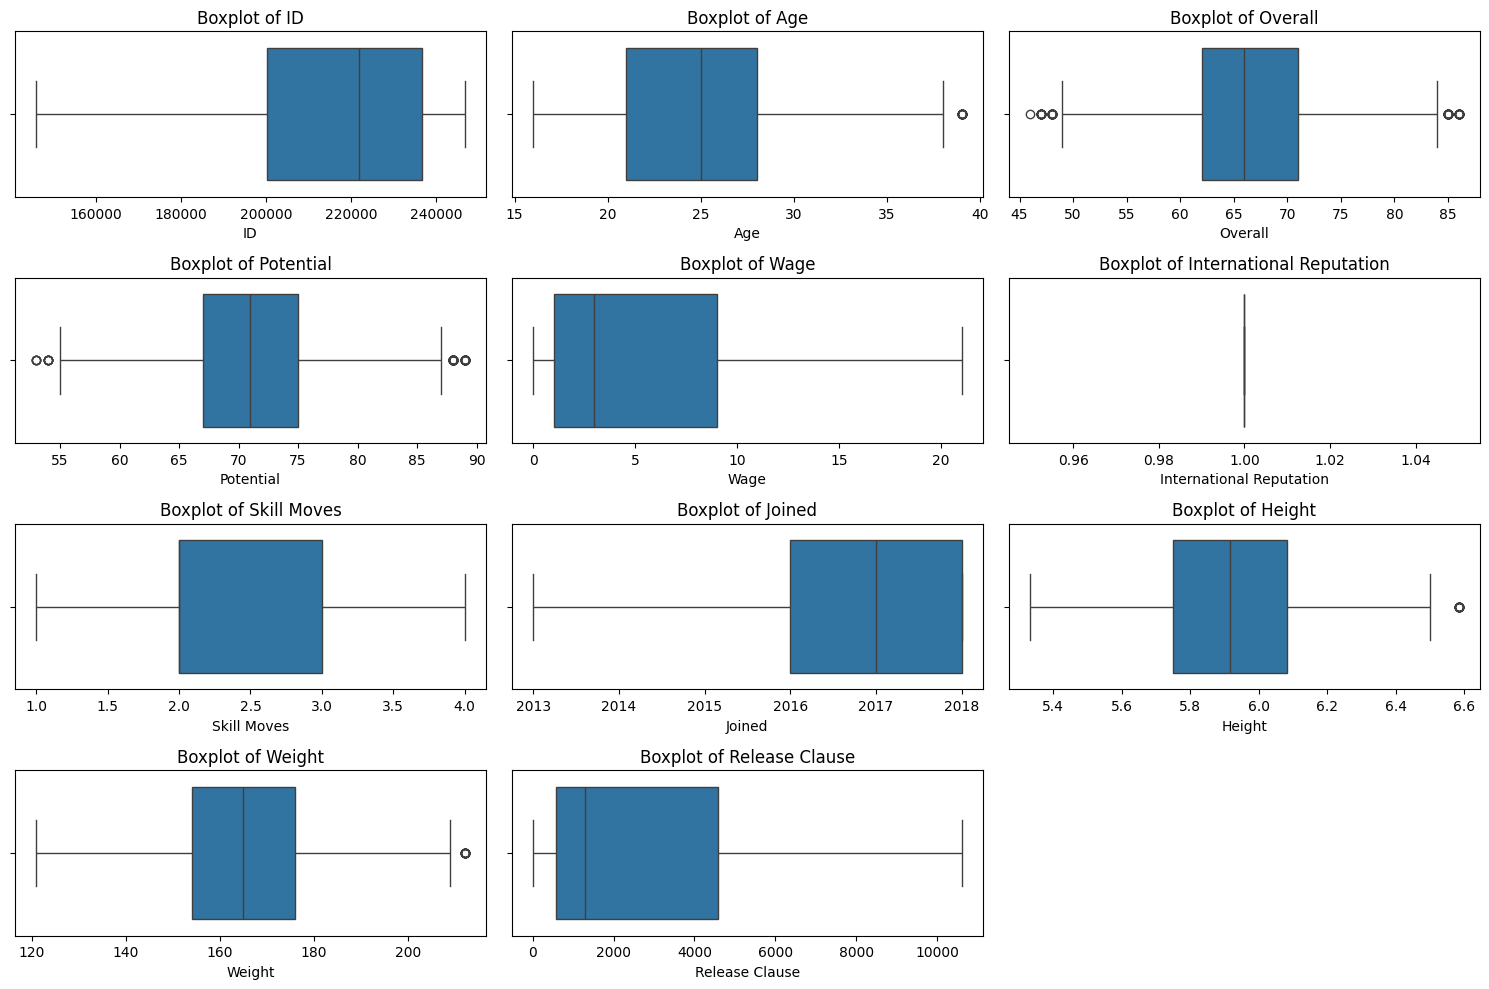

In [23]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot boxplots for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) // 3) + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


## Categorical to numerical

In [24]:
print("""
Before deciding whether to apply Label Encoding or One-Hot Encoding, you should check how many unique values a categorical column has.

| Unique Values | Recommended Encoding                                                  |
| ------------- | --------------------------------------------------------------------- |
| 2 (Binary)    | Label Encoding                                                        |
| Few (≤10–15)  | One-Hot Encoding                                                      |
| Many (>15)    | Label Encoding or Frequency Encoding *(to avoid high dimensionality)* |

""")


Before deciding whether to apply Label Encoding or One-Hot Encoding, you should check how many unique values a categorical column has.

| Unique Values | Recommended Encoding                                                  |
| ------------- | --------------------------------------------------------------------- |
| 2 (Binary)    | Label Encoding                                                        |
| Few (≤10–15)  | One-Hot Encoding                                                      |
| Many (>15)    | Label Encoding or Frequency Encoding *(to avoid high dimensionality)* |




In [25]:
# Count unique values in categorical columns
print("Unique values in 'Preferred Foot':", df['Preferred Foot'].nunique())
print("Unique values in 'Position':", df['Position'].nunique())

# Optionally, view all unique values
print("\nUnique values in 'Preferred Foot':", df['Preferred Foot'].unique())
print("\nUnique values in 'Position':", df['Position'].unique())


Unique values in 'Preferred Foot': 2
Unique values in 'Position': 27

Unique values in 'Preferred Foot': ['Left' 'Right']

Unique values in 'Position': ['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


In [26]:
print("""
Preferred Foot: Only 2 → ✅ Label Encode
Position: 20+ → ⚠️ One-hot encoding may create 20 new columns
  Best options:
  1. Label Encoding (Simple, Fast, Risky for Some Models)-> Best when using tree-based models (e.g., Decision Trees, Random Forests, XGBoost)
  2. Frequency Encoding (Compact, Smart)-> Keeps the column numeric, compact, and ordinal-safe, Works well with most algorithms
""")


Preferred Foot: Only 2 → ✅ Label Encode
Position: 20+ → ⚠️ One-hot encoding may create 20 new columns
  Best options:
  1. Label Encoding (Simple, Fast, Risky for Some Models)-> Best when using tree-based models (e.g., Decision Trees, Random Forests, XGBoost)
  2. Frequency Encoding (Compact, Smart)-> Keeps the column numeric, compact, and ordinal-safe, Works well with most algorithms



In [27]:

# Frequency Encoding for 'Position'
position_freq = df['Position'].value_counts()
df['Position_Encoded'] = df['Position'].map(position_freq)

# Label Encoding for 'Preferred Foot'
df['Preferred_Foot_Encoded'] = df['Preferred Foot'].map({'Left': 0, 'Right': 1})

# Drop original columns if needed
df.drop(['Position', 'Preferred Foot'], axis=1, inplace=True)

# Save or preview the cleaned dataframe
df.to_csv("fifa_encoded.csv", index=False)
print(df.head())


          ID               Name   Age Nationality  Overall  Potential  \
0  158023.00           L. Messi  31.0   Argentina     66.0       71.0   
1  146079.75  Cristiano Ronaldo  33.0    Portugal     66.0       71.0   
2  190871.00          Neymar Jr  26.0      Brazil     66.0       71.0   
3  193080.00             De Gea  27.0       Spain     66.0       71.0   
4  192985.00       K. De Bruyne  27.0     Belgium     66.0       71.0   

                  Club     Value  Wage  International Reputation  Skill Moves  \
0         FC Barcelona  110500.0  21.0                       1.0          4.0   
1             Juventus   77000.0  21.0                       1.0          2.0   
2  Paris Saint-Germain  118500.0  21.0                       1.0          2.0   
3    Manchester United   72000.0  21.0                       1.0          1.0   
4      Manchester City  102000.0  21.0                       1.0          4.0   

   Joined Contract Valid Until    Height  Weight  Release Clause  \
0  201

In [28]:
df_encoded = pd.read_csv('fifa_encoded.csv')
df_encoded.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Skill Moves,Joined,Contract Valid Until,Height,Weight,Release Clause,Position_Encoded,Preferred_Foot_Encoded
0,158023.00,L. Messi,31.0,Argentina,66.0,71.0,FC Barcelona,110500.0,21.0,1.0,4.0,2013.0,2021.0,5.583333,159.0,10607.652016,16,0
1,146079.75,Cristiano Ronaldo,33.0,Portugal,66.0,71.0,Juventus,77000.0,21.0,1.0,2.0,2018.0,2022.0,6.166667,183.0,10607.652016,2154,1
2,190871.00,Neymar Jr,26.0,Brazil,66.0,71.0,Paris Saint-Germain,118500.0,21.0,1.0,2.0,2017.0,2022.0,5.750000,150.0,10607.652016,381,1
3,193080.00,De Gea,27.0,Spain,66.0,71.0,Manchester United,72000.0,21.0,1.0,1.0,2013.0,2020.0,6.333333,168.0,10607.652016,2024,1
4,192985.00,K. De Bruyne,27.0,Belgium,66.0,71.0,Manchester City,102000.0,21.0,1.0,4.0,2015.0,2023.0,5.916667,154.0,10607.652016,391,1


## Related Plots

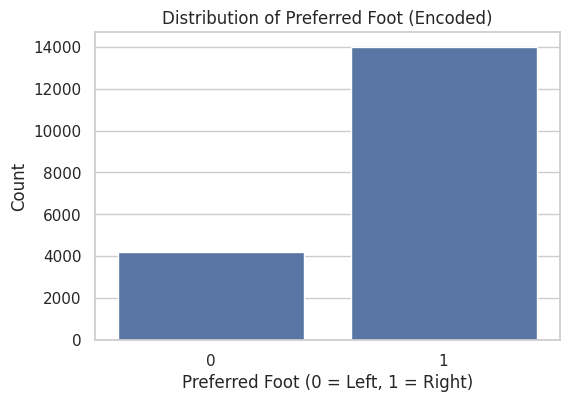

In [29]:

# Set plot style
sns.set(style="whitegrid")

# Count plot for Preferred Foot (encoded)
plt.figure(figsize=(6, 4))
sns.countplot(x='Preferred_Foot_Encoded', data=df_encoded)
plt.title("Distribution of Preferred Foot (Encoded)")
plt.xlabel("Preferred Foot (0 = Left, 1 = Right)")
plt.ylabel("Count")
plt.show()


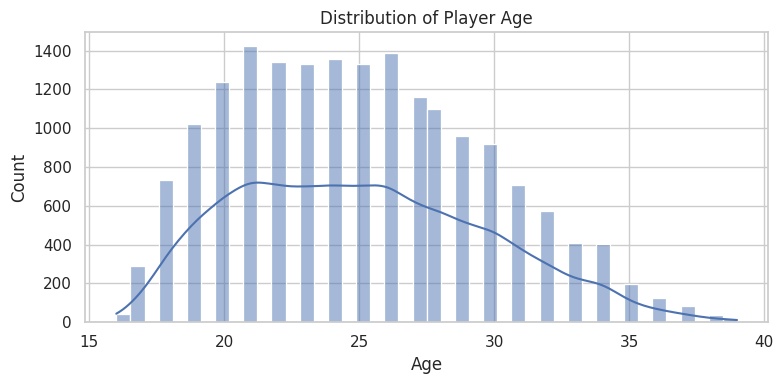

In [30]:
# Distribution Plot for Age
plt.figure(figsize=(8, 4))
sns.histplot(df_encoded['Age'], kde=True)
plt.title("Distribution of Player Age")
plt.tight_layout()
plt.show()

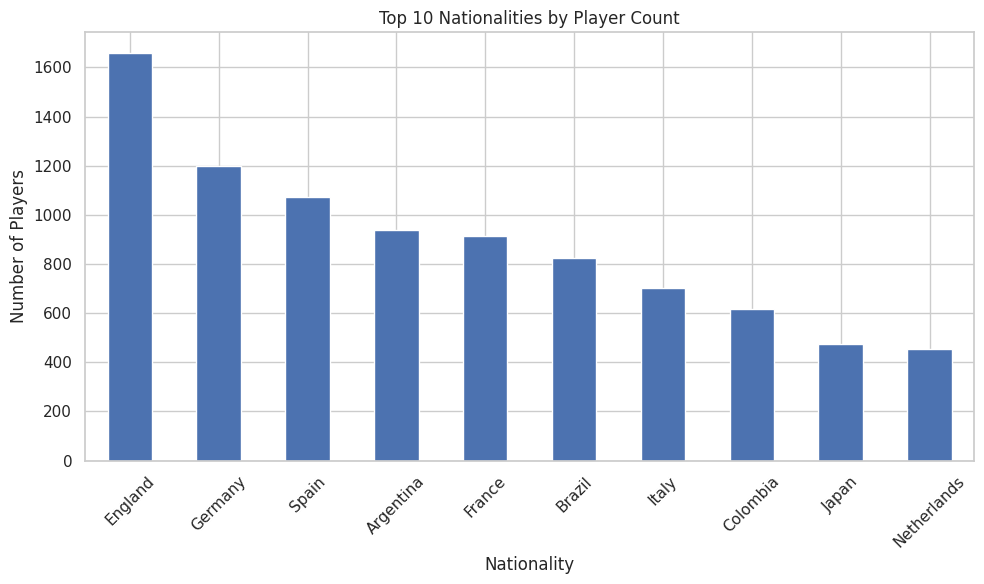

In [31]:
# Bar Plot for Top 10 Nationalities
plt.figure(figsize=(10, 6))
top_nations = df_encoded['Nationality'].value_counts().nlargest(10)
top_nations.plot(kind='bar')
plt.title("Top 10 Nationalities by Player Count")
plt.xlabel("Nationality")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

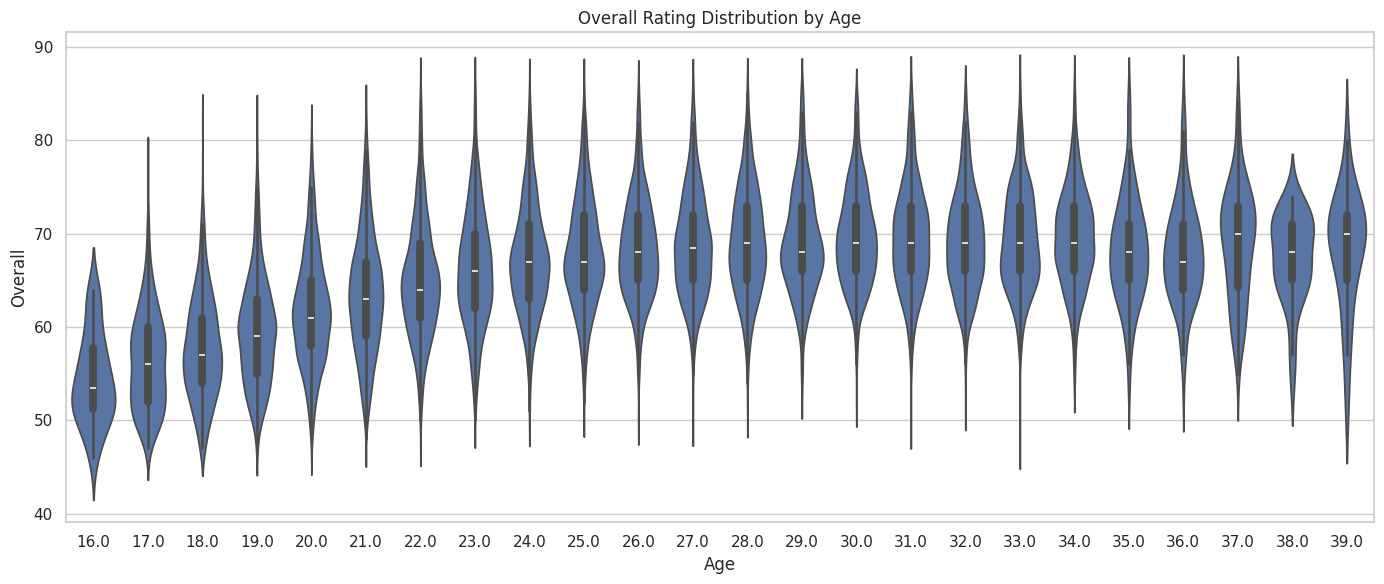

In [32]:
# Violin Plot: Overall Rating by Age
plt.figure(figsize=(14, 6))
sns.violinplot(x='Age', y='Overall', data=df_encoded)
plt.title("Overall Rating Distribution by Age")
plt.tight_layout()
plt.show()

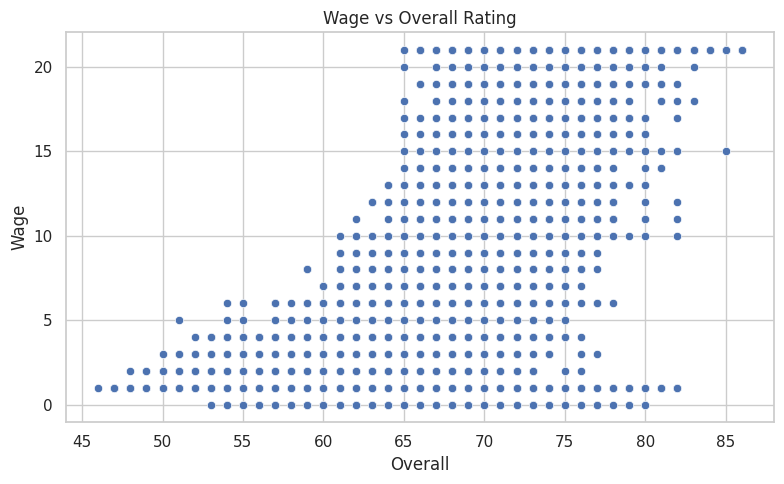

In [33]:
# Scatter Plot: Wage vs Overall
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Overall', y='Wage', data=df_encoded)
plt.title("Wage vs Overall Rating")
plt.tight_layout()
plt.show()

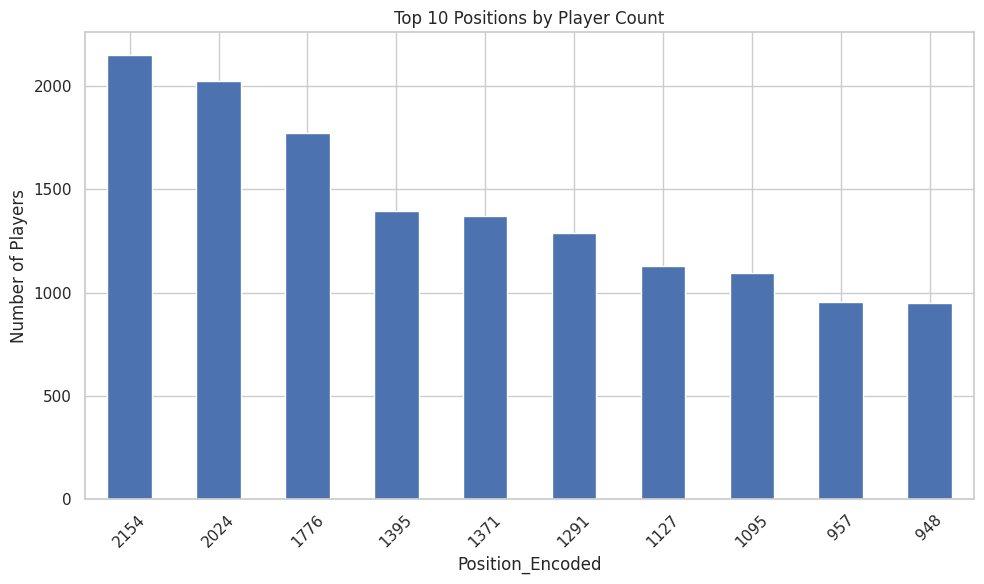

In [34]:
# Bar Plot for Top 10 Positions
plt.figure(figsize=(10, 6))
top_positions = df_encoded['Position_Encoded'].value_counts().nlargest(10)
top_positions.plot(kind='bar')
plt.title("Top 10 Positions by Player Count")
plt.xlabel("Position_Encoded")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Analysis

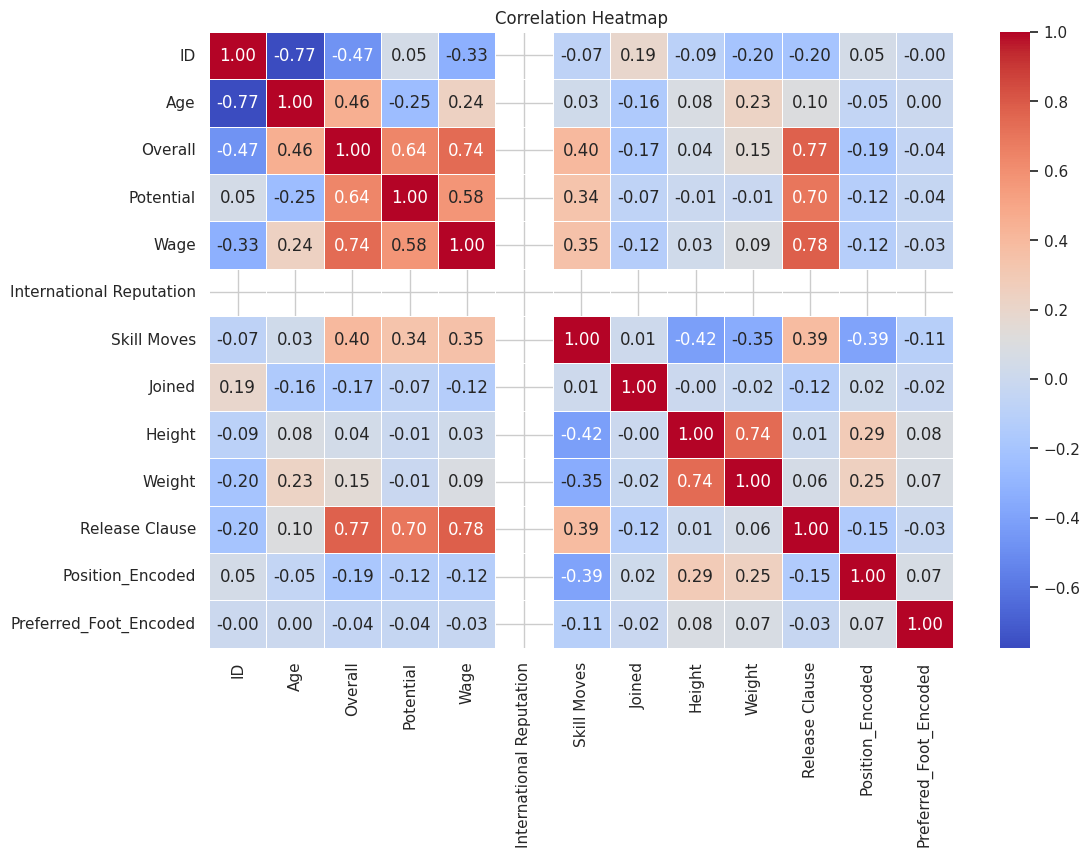

In [35]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Feature Selection

In [36]:
print("""
Feature Selection is the process of selecting the most important variables (features) from your dataset that have the most influence on your target or are most relevant for analysis or prediction.

🧠 Why Feature Selection is Important?
Some features may not carry any useful information (e.g., ID).

Some may be redundant or strongly correlated with others.

Keeping only useful features helps build simpler, faster, and more accurate models.
""")


Feature Selection is the process of selecting the most important variables (features) from your dataset that have the most influence on your target or are most relevant for analysis or prediction.

🧠 Why Feature Selection is Important?
Some features may not carry any useful information (e.g., ID).

Some may be redundant or strongly correlated with others.

Keeping only useful features helps build simpler, faster, and more accurate models.



In [37]:
print("""
Let’s assume we want to prepare this dataset for a predictive model (e.g., predicting Overall player rating). So, we’ll select features that are:

Not identifiers
Numerically meaningful
Relevant to a player's skills or profile

Here are the approaches we can use:
1. Remove Unnecessary Features (Manual/Domain Knowledge)->ex:'ID' is just a unique identifier, so drop it
2. Correlation Heatmap->If two features are highly correlated (say > 0.9), drop one of them.
3. Univariate Feature Selection (using SelectKBest)->Keep features with the highest scores.
4. Variance Thresholding->Removes features with very little variance (i.e., mostly the same value).
""")


Let’s assume we want to prepare this dataset for a predictive model (e.g., predicting Overall player rating). So, we’ll select features that are:

Not identifiers
Numerically meaningful
Relevant to a player's skills or profile

Here are the approaches we can use:
1. Remove Unnecessary Features (Manual/Domain Knowledge)->ex:'ID' is just a unique identifier, so drop it
2. Correlation Heatmap->If two features are highly correlated (say > 0.9), drop one of them.
3. Univariate Feature Selection (using SelectKBest)->Keep features with the highest scores.
4. Variance Thresholding->Removes features with very little variance (i.e., mostly the same value).



In [44]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np # Import numpy for handling NaN values

# Drop non-numeric and identifier/text columns
df_numeric = df_encoded.drop(columns=['Name', 'Nationality', 'Club', 'Contract Valid Until'])

# Convert 'Value' column to numeric, replacing '€0' with 0.0 and coercing errors
df_numeric['Value'] = df_numeric['Value'].replace('€0', 0.0).astype(float)

# Apply Variance Threshold
selector = VarianceThreshold()  # Default threshold = 0.0
selector.fit(df_numeric)

# Get the retained feature names
retained_columns = df_numeric.columns[selector.get_support()]

# Create new DataFrame with selected features
df_selected = df_numeric[retained_columns]

# View result
print("Selected Features:")
print(df_selected.columns)

Selected Features:
Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Skill Moves',
       'Joined', 'Height', 'Weight', 'Release Clause', 'Position_Encoded',
       'Preferred_Foot_Encoded'],
      dtype='object')


In [45]:
print("\nUnique values in 'Value':", df['Value'].unique())
# Due to a value '€0' in the column we had to Convert 'Value' column to numeric, replacing '€0' with 0.0


Unique values in 'Value': [110500.0 77000.0 118500.0 72000.0 102000.0 93000.0 67000.0 80000.0
 51000.0 68000.0 76500.0 44000.0 60000.0 63000.0 89000.0 83500.0 78000.0
 58000.0 53500.0 51500.0 38000.0 64500.0 27000.0 81000.0 69500.0 59500.0
 62000.0 73500.0 59000.0 46000.0 43000.0 36000.0 57000.0 24000.0 30000.0
 4000.0 64000.0 30500.0 62500.0 52000.0 45000.0 34000.0 46500.0 61000.0
 41500.0 44500.0 56500.0 53000.0 50000.0 55000.0 36500.0 45500.0 43500.0
 35000.0 39000.0 18000.0 21500.0 50500.0 54000.0 40500.0 37500.0 28500.0
 37000.0 32000.0 26000.0 33000.0 38500.0 35500.0 9000.0 15500.0 22000.0
 14000.0 42500.0 31500.0 42000.0 25000.0 29500.0 31000.0 24500.0 27500.0
 29000.0 16500.0 23000.0 19000.0 4200.0 40000.0 41000.0 28000.0 22500.0
 34500.0 32500.0 20000.0 26500.0 25500.0 21000.0 13000.0 17500.0 11500.0
 8000.0 6000.0 19500.0 6500.0 20500.0 23500.0 18500.0 17000.0 12500.0
 15000.0 13500.0 4800.0 3000.0 1500.0 16000.0 10000.0 11000.0 7000.0
 14500.0 5500.0 10500.0 4500.0 12000.0 